# একটি শ্রেণীবিন্যাস মডেল তৈরি করুন: সুস্বাদু এশিয়ান এবং ভারতীয় খাবার


## রান্নার শ্রেণীবিন্যাসকারী ১

এই পাঠে, আমরা বিভিন্ন শ্রেণীবিন্যাসকারী নিয়ে আলোচনা করব যা *উপকরণের একটি গোষ্ঠীর উপর ভিত্তি করে একটি নির্দিষ্ট জাতীয় রান্নার পূর্বাভাস দিতে পারে।* এটি করতে গিয়ে, আমরা শিখব কীভাবে শ্রেণীবিন্যাস কাজের জন্য অ্যালগরিদম ব্যবহার করা যায়।

### [**পাঠের আগে কুইজ**](https://gray-sand-07a10f403.1.azurestaticapps.net/quiz/21/)

### **প্রস্তুতি**

এই পাঠটি আমাদের [পূর্ববর্তী পাঠের](https://github.com/microsoft/ML-For-Beginners/blob/main/4-Classification/1-Introduction/solution/lesson_10-R.ipynb) উপর ভিত্তি করে তৈরি, যেখানে আমরা:

-   এশিয়া এবং ভারতের সমস্ত অসাধারণ রান্না নিয়ে একটি ডেটাসেট ব্যবহার করে শ্রেণীবিন্যাসের একটি সহজ পরিচিতি দিয়েছিলাম 😋।

-   আমাদের ডেটা প্রস্তুত ও পরিষ্কার করার জন্য কিছু [dplyr ক্রিয়া](https://dplyr.tidyverse.org/) অন্বেষণ করেছিলাম।

-   ggplot2 ব্যবহার করে সুন্দর ভিজ্যুয়ালাইজেশন তৈরি করেছিলাম।

-   [recipes](https://recipes.tidymodels.org/articles/Simple_Example.html) ব্যবহার করে ডেটা প্রিপ্রসেসিংয়ের মাধ্যমে ভারসাম্যহীন ডেটার সাথে কীভাবে কাজ করতে হয় তা দেখিয়েছিলাম।

-   আমাদের রেসিপি `prep` এবং `bake` করে নিশ্চিত করেছিলাম যে এটি প্রত্যাশিতভাবে কাজ করবে।

#### **প্রয়োজনীয় জ্ঞান**

এই পাঠের জন্য, আমাদের ডেটা পরিষ্কার, প্রস্তুত এবং ভিজ্যুয়ালাইজ করার জন্য নিম্নলিখিত প্যাকেজগুলোর প্রয়োজন হবে:

-   `tidyverse`: [tidyverse](https://www.tidyverse.org/) হলো একটি [R প্যাকেজের সংগ্রহ](https://www.tidyverse.org/packages) যা ডেটা সায়েন্সকে দ্রুত, সহজ এবং আরও মজাদার করে তোলে!

-   `tidymodels`: [tidymodels](https://www.tidymodels.org/) ফ্রেমওয়ার্ক হলো মডেলিং এবং মেশিন লার্নিংয়ের জন্য একটি [প্যাকেজের সংগ্রহ](https://www.tidymodels.org/packages/)।

-   `themis`: [themis প্যাকেজ](https://themis.tidymodels.org/) ভারসাম্যহীন ডেটার সাথে কাজ করার জন্য অতিরিক্ত রেসিপি ধাপ সরবরাহ করে।

-   `nnet`: [nnet প্যাকেজ](https://cran.r-project.org/web/packages/nnet/nnet.pdf) একটি একক লুকানো স্তর সহ ফিড-ফরোয়ার্ড নিউরাল নেটওয়ার্ক এবং বহুপদী লজিস্টিক রিগ্রেশন মডেল অনুমান করার জন্য ফাংশন সরবরাহ করে।

আপনি এগুলো নিম্নলিখিতভাবে ইনস্টল করতে পারেন:


`install.packages(c("tidyverse", "tidymodels", "DataExplorer", "here"))`

অন্যভাবে, নিচের স্ক্রিপ্টটি পরীক্ষা করে দেখবে আপনার কাছে এই মডিউল সম্পন্ন করার জন্য প্রয়োজনীয় প্যাকেজগুলো আছে কিনা এবং যদি না থাকে তবে সেগুলো ইনস্টল করবে।


In [2]:
suppressWarnings(if (!require("pacman"))install.packages("pacman"))

pacman::p_load(tidyverse, tidymodels, themis, here)

Loading required package: pacman



## ১. ডেটাকে প্রশিক্ষণ এবং পরীক্ষার সেটে ভাগ করুন।

আমরা আমাদের আগের পাঠ থেকে কিছু ধাপ বেছে নিয়ে শুরু করব।

### `dplyr::select()` ব্যবহার করে এমন সাধারণ উপাদানগুলো বাদ দিন যা বিভিন্ন রান্নার মধ্যে বিভ্রান্তি সৃষ্টি করে।

সবাইই চাল, রসুন এবং আদা পছন্দ করে!


In [3]:
# Load the original cuisines data
df <- read_csv(file = "https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/4-Classification/data/cuisines.csv")

# Drop id column, rice, garlic and ginger from our original data set
df_select <- df %>% 
  select(-c(1, rice, garlic, ginger)) %>%
  # Encode cuisine column as categorical
  mutate(cuisine = factor(cuisine))

# Display new data set
df_select %>% 
  slice_head(n = 5)

# Display distribution of cuisines
df_select %>% 
  count(cuisine) %>% 
  arrange(desc(n))

New names:
* `` -> ...1

Rows: 2448 Columns: 385

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): cuisine
dbl (384): ...1, almond, angelica, anise, anise_seed, apple, apple_brandy, a...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



cuisine almond angelica anise anise_seed apple apple_brandy apricot armagnac
1 indian  0      0        0     0          0     0            0       0       
2 indian  1      0        0     0          0     0            0       0       
3 indian  0      0        0     0          0     0            0       0       
4 indian  0      0        0     0          0     0            0       0       
5 indian  0      0        0     0          0     0            0       0       
  artemisia ⋯ whiskey white_bread white_wine whole_grain_wheat_flour wine wood
1 0         ⋯ 0       0           0          0                       0    0   
2 0         ⋯ 0       0           0          0                       0    0   
3 0         ⋯ 0       0           0          0                       0    0   
4 0         ⋯ 0       0           0          0                       0    0   
5 0         ⋯ 0       0           0          0                       0    0   
  yam yeast yogurt zucchini
1 0   0     0      0       
2 0   0     0      0       
3 0   0     0      0       
4 0   0     0      0       
5 0   0     1      0

cuisine  n  
1 korean   799
2 indian   598
3 chinese  442
4 japanese 320
5 thai     289

দারুণ! এখন ডেটা এমনভাবে ভাগ করার সময় এসেছে যাতে ৭০% ডেটা প্রশিক্ষণের জন্য এবং ৩০% ডেটা পরীক্ষার জন্য যায়। আমরা ডেটা ভাগ করার সময় `stratification` পদ্ধতিও প্রয়োগ করব, যাতে প্রশিক্ষণ এবং যাচাইকরণ ডেটাসেটে প্রতিটি রান্নার ধরন (cuisine)-এর অনুপাত বজায় থাকে।

[rsample](https://rsample.tidymodels.org/), যা Tidymodels-এর একটি প্যাকেজ, কার্যকর ডেটা ভাগ এবং পুনঃনমুনার জন্য অবকাঠামো প্রদান করে:


In [4]:
# Load the core Tidymodels packages into R session
library(tidymodels)

# Create split specification
set.seed(2056)
cuisines_split <- initial_split(data = df_select,
                                strata = cuisine,
                                prop = 0.7)

# Extract the data in each split
cuisines_train <- training(cuisines_split)
cuisines_test <- testing(cuisines_split)

# Print the number of cases in each split
cat("Training cases: ", nrow(cuisines_train), "\n",
    "Test cases: ", nrow(cuisines_test), sep = "")

# Display the first few rows of the training set
cuisines_train %>% 
  slice_head(n = 5)


# Display distribution of cuisines in the training set
cuisines_train %>% 
  count(cuisine) %>% 
  arrange(desc(n))

Training cases: 1712
Test cases: 736

cuisine almond angelica anise anise_seed apple apple_brandy apricot armagnac
1 chinese 0      0        0     0          0     0            0       0       
2 chinese 0      0        0     0          0     0            0       0       
3 chinese 0      0        0     0          0     0            0       0       
4 chinese 0      0        0     0          0     0            0       0       
5 chinese 0      0        0     0          0     0            0       0       
  artemisia ⋯ whiskey white_bread white_wine whole_grain_wheat_flour wine wood
1 0         ⋯ 0       0           0          0                       1    0   
2 0         ⋯ 0       0           0          0                       1    0   
3 0         ⋯ 0       0           0          0                       0    0   
4 0         ⋯ 0       0           0          0                       0    0   
5 0         ⋯ 0       0           0          0                       0    0   
  yam yeast yogurt zucchini
1 0   0     0      0       
2 0   0     0      0       
3 0   0     0      0       
4 0   0     0      0       
5 0   0     0      0

cuisine  n  
1 korean   559
2 indian   418
3 chinese  309
4 japanese 224
5 thai     202

## 2. ভারসাম্যহীন ডেটার সাথে কাজ করা

আপনি হয়তো লক্ষ্য করেছেন যে মূল ডেটাসেট এবং আমাদের প্রশিক্ষণ সেটে রান্নার ধরনগুলোর সংখ্যায় বেশ অসম বণ্টন রয়েছে। কোরিয়ান রান্নার সংখ্যা *প্রায়* থাই রান্নার সংখ্যার তিন গুণ। ভারসাম্যহীন ডেটা প্রায়শই মডেলের কার্যকারিতার উপর নেতিবাচক প্রভাব ফেলে। অনেক মডেল তখনই সবচেয়ে ভালো কাজ করে যখন পর্যবেক্ষণের সংখ্যা সমান হয় এবং তাই ভারসাম্যহীন ডেটার সাথে কাজ করতে গিয়ে সমস্যায় পড়ে।

ভারসাম্যহীন ডেটাসেটের সাথে কাজ করার দুটি প্রধান উপায় রয়েছে:

-   সংখ্যালঘু শ্রেণিতে পর্যবেক্ষণ যোগ করা: `Over-sampling`, যেমন SMOTE অ্যালগরিদম ব্যবহার করা, যা সংখ্যালঘু শ্রেণির নতুন উদাহরণ কৃত্রিমভাবে তৈরি করে এই কেসগুলোর নিকটতম প্রতিবেশীদের ব্যবহার করে।

-   সংখ্যাগরিষ্ঠ শ্রেণি থেকে পর্যবেক্ষণ সরিয়ে ফেলা: `Under-sampling`

আমাদের আগের পাঠে, আমরা একটি `recipe` ব্যবহার করে কীভাবে ভারসাম্যহীন ডেটাসেটের সাথে কাজ করতে হয় তা দেখিয়েছি। একটি রেসিপিকে এমন একটি নকশা হিসেবে ভাবা যেতে পারে যা বর্ণনা করে যে ডেটাসেটকে ডেটা বিশ্লেষণের জন্য প্রস্তুত করতে কী কী ধাপ প্রয়োগ করা উচিত। আমাদের ক্ষেত্রে, আমরা চাই আমাদের `training set`-এ রান্নার ধরনগুলোর সংখ্যায় সমান বণ্টন থাকুক। চলুন, সরাসরি কাজ শুরু করি।


In [5]:
# Load themis package for dealing with imbalanced data
library(themis)

# Create a recipe for preprocessing training data
cuisines_recipe <- recipe(cuisine ~ ., data = cuisines_train) %>% 
  step_smote(cuisine)

# Print recipe
cuisines_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor        380

Operations:

SMOTE based on cuisine

আপনি অবশ্যই নিশ্চিত করতে পারেন (prep + bake ব্যবহার করে) যে রেসিপিটি আপনার প্রত্যাশা অনুযায়ী কাজ করবে - সব কুইজিন লেবেলে `559`টি পর্যবেক্ষণ রয়েছে।

যেহেতু আমরা এই রেসিপিটিকে মডেলিংয়ের জন্য একটি প্রিপ্রসেসর হিসেবে ব্যবহার করব, একটি `workflow()` আমাদের জন্য সমস্ত prep এবং bake সম্পন্ন করবে, তাই আমাদের রেসিপিটি ম্যানুয়ালি অনুমান করতে হবে না।

এখন আমরা একটি মডেল প্রশিক্ষণের জন্য প্রস্তুত 👩‍💻👨‍💻!

## ৩. আপনার ক্লাসিফায়ার নির্বাচন করা

<p >
   <img src="../../images/parsnip.jpg"
   width="600"/>
   <figcaption>@allison_horst এর শিল্পকর্ম</figcaption>


এখন আমাদের সিদ্ধান্ত নিতে হবে কোন অ্যালগরিদমটি এই কাজের জন্য ব্যবহার করা হবে 🤔।

Tidymodels-এ, [`parsnip প্যাকেজ`](https://parsnip.tidymodels.org/index.html) বিভিন্ন ইঞ্জিন (প্যাকেজ) জুড়ে মডেলের সাথে কাজ করার জন্য একটি সঙ্গতিপূর্ণ ইন্টারফেস প্রদান করে। দয়া করে parsnip ডকুমেন্টেশনটি দেখুন [মডেলের ধরন ও ইঞ্জিন](https://www.tidymodels.org/find/parsnip/#models) এবং তাদের সংশ্লিষ্ট [মডেল আর্গুমেন্ট](https://www.tidymodels.org/find/parsnip/#model-args) অন্বেষণ করার জন্য। প্রথম দেখায় বৈচিত্র্যটি বেশ বিভ্রান্তিকর মনে হতে পারে। উদাহরণস্বরূপ, নিম্নলিখিত পদ্ধতিগুলি সবই শ্রেণীবিন্যাস কৌশল অন্তর্ভুক্ত করে:

-   C5.0 রুল-ভিত্তিক শ্রেণীবিন্যাস মডেল

-   ফ্লেক্সিবল ডিসক্রিমিন্যান্ট মডেল

-   লিনিয়ার ডিসক্রিমিন্যান্ট মডেল

-   রেগুলারাইজড ডিসক্রিমিন্যান্ট মডেল

-   লজিস্টিক রিগ্রেশন মডেল

-   মাল্টিনোমিয়াল রিগ্রেশন মডেল

-   নেভ বেইজ মডেল

-   সাপোর্ট ভেক্টর মেশিন

-   নিকটতম প্রতিবেশী

-   ডিসিশন ট্রি

-   এনসেম্বল পদ্ধতি

-   নিউরাল নেটওয়ার্ক

তালিকাটি চলতেই থাকে!

### **কোন শ্রেণীবিন্যাসকারী বেছে নেবেন?**

তাহলে, কোন শ্রেণীবিন্যাসকারীটি আপনি বেছে নেবেন? প্রায়শই, কয়েকটি চালিয়ে দেখা এবং একটি ভালো ফলাফলের জন্য পরীক্ষা করা একটি উপায়।

> AutoML এই সমস্যাটি চমৎকারভাবে সমাধান করে ক্লাউডে এই তুলনাগুলি চালিয়ে, আপনার ডেটার জন্য সেরা অ্যালগরিদমটি বেছে নেওয়ার সুযোগ দেয়। এটি [এখানে](https://docs.microsoft.com/learn/modules/automate-model-selection-with-azure-automl/?WT.mc_id=academic-77952-leestott) চেষ্টা করুন।

এছাড়াও শ্রেণীবিন্যাসকারীর পছন্দ আমাদের সমস্যার উপর নির্ভর করে। উদাহরণস্বরূপ, যখন ফলাফলটি `দুইটির বেশি শ্রেণীতে` শ্রেণীবদ্ধ করা যায়, যেমন আমাদের ক্ষেত্রে, আপনাকে `মাল্টিক্লাস শ্রেণীবিন্যাস অ্যালগরিদম` ব্যবহার করতে হবে `বাইনারি শ্রেণীবিন্যাস` এর পরিবর্তে।

### **একটি ভালো পদ্ধতি**

তবে, এলোমেলোভাবে অনুমান করার চেয়ে একটি ভালো উপায় হল এই ডাউনলোডযোগ্য [ML চিট শিট](https://docs.microsoft.com/azure/machine-learning/algorithm-cheat-sheet?WT.mc_id=academic-77952-leestott)-এর ধারণাগুলি অনুসরণ করা। এখানে, আমরা আবিষ্কার করি যে, আমাদের মাল্টিক্লাস সমস্যার জন্য, আমাদের কিছু বিকল্প রয়েছে:

<p >
   <img src="../../images/cheatsheet.png"
   width="500"/>
   <figcaption>মাইক্রোসফটের অ্যালগরিদম চিট শিটের একটি অংশ, যেখানে মাল্টিক্লাস শ্রেণীবিন্যাসের বিকল্পগুলি দেখানো হয়েছে</figcaption>


### **যুক্তি**

চলুন আমরা বিভিন্ন পদ্ধতির মাধ্যমে সমস্যার সমাধান করার চেষ্টা করি, আমাদের সীমাবদ্ধতাগুলো মাথায় রেখে:

-   **ডিপ নিউরাল নেটওয়ার্ক খুব ভারী।** আমাদের ডেটাসেট পরিষ্কার কিন্তু সীমিত, এবং আমরা লোকাল নোটবুকে ট্রেনিং চালাচ্ছি, তাই ডিপ নিউরাল নেটওয়ার্ক এই কাজের জন্য খুব ভারী।

-   **দুই-শ্রেণীর ক্লাসিফায়ার নয়।** আমরা দুই-শ্রেণীর ক্লাসিফায়ার ব্যবহার করছি না, তাই এটি এক-ভি-অল পদ্ধতিকে বাদ দেয়।

-   **ডিসিশন ট্রি বা লজিস্টিক রিগ্রেশন কাজ করতে পারে।** ডিসিশন ট্রি কাজ করতে পারে, অথবা মাল্টিনোমিয়াল রিগ্রেশন/মাল্টিক্লাস লজিস্টিক রিগ্রেশন মাল্টিক্লাস ডেটার জন্য কার্যকর হতে পারে।

-   **মাল্টিক্লাস বুস্টেড ডিসিশন ট্রি ভিন্ন সমস্যা সমাধান করে।** মাল্টিক্লাস বুস্টেড ডিসিশন ট্রি সাধারণত নন-প্যারামেট্রিক কাজের জন্য উপযুক্ত, যেমন র‍্যাঙ্কিং তৈরি করার কাজ, তাই এটি আমাদের জন্য কার্যকর নয়।

সাধারণত, জটিল মেশিন লার্নিং মডেল যেমন এনসেম্বল পদ্ধতি শুরু করার আগে, সবচেয়ে সহজ মডেল তৈরি করা ভালো, যাতে বোঝা যায় কী ঘটছে। তাই এই পাঠে আমরা `মাল্টিনোমিয়াল রিগ্রেশন` মডেল দিয়ে শুরু করব।

> লজিস্টিক রিগ্রেশন একটি পদ্ধতি যা ব্যবহার করা হয় যখন আউটকাম ভ্যারিয়েবল ক্যাটেগরিক্যাল (বা নামমাত্র) হয়। বাইনারি লজিস্টিক রিগ্রেশনের ক্ষেত্রে আউটকাম ভ্যারিয়েবল দুইটি হয়, যেখানে মাল্টিনোমিয়াল লজিস্টিক রিগ্রেশনের ক্ষেত্রে আউটকাম ভ্যারিয়েবল দুইটির বেশি হয়। আরও জানতে [Advanced Regression Methods](https://bookdown.org/chua/ber642_advanced_regression/multinomial-logistic-regression.html) দেখুন।

## ৪. মাল্টিনোমিয়াল লজিস্টিক রিগ্রেশন মডেল ট্রেন এবং মূল্যায়ন করুন।

Tidymodels-এ, `parsnip::multinom_reg()` একটি মডেল সংজ্ঞায়িত করে যা লিনিয়ার প্রেডিক্টর ব্যবহার করে মাল্টিক্লাস ডেটা মাল্টিনোমিয়াল ডিস্ট্রিবিউশন দিয়ে প্রেডিক্ট করে। এই মডেল ফিট করার বিভিন্ন উপায়/ইঞ্জিন দেখতে `?multinom_reg()` দেখুন।

এই উদাহরণে, আমরা ডিফল্ট [nnet](https://cran.r-project.org/web/packages/nnet/nnet.pdf) ইঞ্জিন ব্যবহার করে একটি মাল্টিনোমিয়াল রিগ্রেশন মডেল ফিট করব।

> আমি `penalty` এর একটি মান এলোমেলোভাবে বেছে নিয়েছি। এই মান বেছে নেওয়ার আরও ভালো উপায় আছে, যেমন `resampling` এবং মডেল `tuning` করা, যা আমরা পরে আলোচনা করব।
>
> মডেল হাইপারপ্যারামিটার টিউনিং সম্পর্কে আরও জানতে [Tidymodels: Get Started](https://www.tidymodels.org/start/tuning/) দেখুন।


In [6]:
# Create a multinomial regression model specification
mr_spec <- multinom_reg(penalty = 1) %>% 
  set_engine("nnet", MaxNWts = 2086) %>% 
  set_mode("classification")

# Print model specification
mr_spec

Multinomial Regression Model Specification (classification)

Main Arguments:
  penalty = 1

Engine-Specific Arguments:
  MaxNWts = 2086

Computational engine: nnet 


দারুণ কাজ 🥳! এখন যেহেতু আমাদের কাছে একটি রেসিপি এবং একটি মডেল স্পেসিফিকেশন রয়েছে, আমাদের সেগুলো একসাথে একটি অবজেক্টে সংযুক্ত করার উপায় খুঁজতে হবে যা প্রথমে ডেটা প্রিপ্রসেস করবে, তারপর প্রিপ্রসেসড ডেটার উপর মডেল ফিট করবে এবং সম্ভাব্য পোস্ট-প্রসেসিং কার্যক্রমের জন্যও সুযোগ দেবে। Tidymodels-এ, এই সুবিধাজনক অবজেক্টটিকে [`workflow`](https://workflows.tidymodels.org/) বলা হয় এবং এটি আপনার মডেলিং কম্পোনেন্টগুলোকে সহজভাবে ধরে রাখে! এটিকে আমরা *Python*-এ *pipelines* বলি।

তাহলে চলুন সবকিছু একটি workflow-এ সংযুক্ত করি!📦


In [7]:
# Bundle recipe and model specification
mr_wf <- workflow() %>% 
  add_recipe(cuisines_recipe) %>% 
  add_model(mr_spec)

# Print out workflow
mr_wf

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: multinom_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_smote()

── Model ───────────────────────────────────────────────────────────────────────
Multinomial Regression Model Specification (classification)

Main Arguments:
  penalty = 1

Engine-Specific Arguments:
  MaxNWts = 2086

Computational engine: nnet 


ওয়ার্কফ্লো 👌👌! একটি **`workflow()`** প্রায় একইভাবে ফিট করা যায় যেভাবে একটি মডেল ফিট করা যায়। তাহলে, মডেল প্রশিক্ষণের সময়!


In [8]:
# Train a multinomial regression model
mr_fit <- fit(object = mr_wf, data = cuisines_train)

mr_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: multinom_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_smote()

── Model ───────────────────────────────────────────────────────────────────────
Call:
nnet::multinom(formula = ..y ~ ., data = data, decay = ~1, MaxNWts = ~2086, 
    trace = FALSE)

Coefficients:
         (Intercept)     almond angelica         anise anise_seed       apple
indian    0.19723325  0.2409661        0 -5.004955e-05 -0.1657635 -0.05769734
japanese  0.13961959 -0.6262400        0 -1.169155e-04 -0.4893596 -0.08585717
korean    0.22377347 -0.1833485        0 -5.560395e-05 -0.2489401 -0.15657804
thai     -0.04336577 -0.6106258        0  4.903828e-04 -0.5782866  0.63451105
         apple_brandy     apricot armagnac   artemisia artichoke   asparagus
indian              0  0.37042636        0 -0.09122797         0 -0.27181970
japanese            0

মডেল প্রশিক্ষণের সময় যে সহগগুলো শিখেছে, সেগুলো আউটপুটে প্রদর্শিত হয়।

### প্রশিক্ষিত মডেল মূল্যায়ন করুন

এখন সময় এসেছে মডেলটি কেমন কাজ করেছে তা মূল্যায়ন করার 📏, একটি টেস্ট সেটের উপর পরীক্ষা করে! চলুন শুরু করি টেস্ট সেটের উপর পূর্বাভাস তৈরি করে।


In [9]:
# Make predictions on the test set
results <- cuisines_test %>% select(cuisine) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test))

# Print out results
results %>% 
  slice_head(n = 5)

cuisine .pred_class
1 indian  thai       
2 indian  indian     
3 indian  indian     
4 indian  indian     
5 indian  indian

দারুণ কাজ! Tidymodels-এ, মডেলের কার্যকারিতা মূল্যায়ন করা যেতে পারে [yardstick](https://yardstick.tidymodels.org/) ব্যবহার করে - একটি প্যাকেজ যা কর্মক্ষমতার মেট্রিক ব্যবহার করে মডেলের কার্যকারিতা পরিমাপ করতে ব্যবহৃত হয়। যেমনটি আমরা আমাদের লজিস্টিক রিগ্রেশন পাঠে করেছি, চলুন একটি কনফিউশন ম্যাট্রিক্স গণনা করে শুরু করি।


In [10]:
# Confusion matrix for categorical data
conf_mat(data = results, truth = cuisine, estimate = .pred_class)


          Truth
Prediction chinese indian japanese korean thai
  chinese       83      1        8     15   10
  indian         4    163        1      2    6
  japanese      21      5       73     25    1
  korean        15      0       11    191    0
  thai          10     11        3      7   70

যখন একাধিক শ্রেণীর সাথে কাজ করা হয়, এটি সাধারণত একটি তাপ মানচিত্র হিসাবে কল্পনা করা আরও সহজ হয়, যেমন:


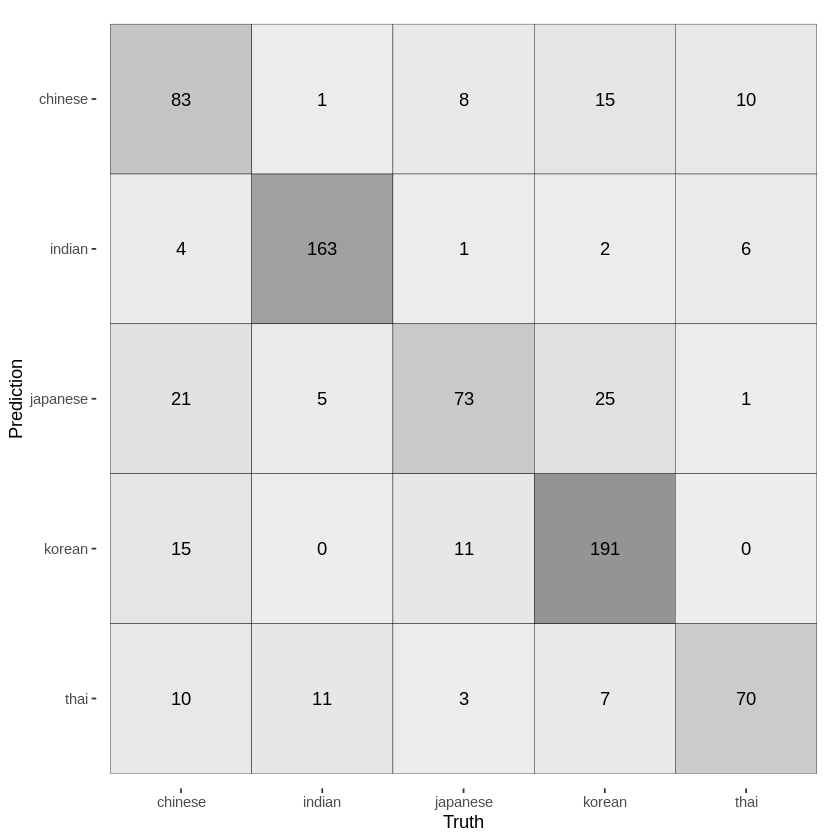

In [11]:
update_geom_defaults(geom = "tile", new = list(color = "black", alpha = 0.7))
# Visualize confusion matrix
results %>% 
  conf_mat(cuisine, .pred_class) %>% 
  autoplot(type = "heatmap")

কনফিউশন ম্যাট্রিক্স প্লটে গাঢ় রঙের বর্গগুলো উচ্চ সংখ্যক কেস নির্দেশ করে, এবং আপনি সম্ভবত গাঢ় রঙের বর্গগুলোর একটি তির্যক রেখা দেখতে পাবেন যা নির্দেশ করে যে যেখানে প্রেডিক্টেড এবং প্রকৃত লেবেল একই।

এখন চলুন কনফিউশন ম্যাট্রিক্সের জন্য সারসংক্ষেপ পরিসংখ্যান গণনা করি।


In [12]:
# Summary stats for confusion matrix
conf_mat(data = results, truth = cuisine, estimate = .pred_class) %>% 
summary()

.metric              .estimator .estimate
1  accuracy             multiclass 0.7880435
2  kap                  multiclass 0.7276583
3  sens                 macro      0.7780927
4  spec                 macro      0.9477598
5  ppv                  macro      0.7585583
6  npv                  macro      0.9460080
7  mcc                  multiclass 0.7292724
8  j_index              macro      0.7258524
9  bal_accuracy         macro      0.8629262
10 detection_prevalence macro      0.2000000
11 precision            macro      0.7585583
12 recall               macro      0.7780927
13 f_meas               macro      0.7641862

যদি আমরা কিছু মেট্রিক যেমন সঠিকতা, সংবেদনশীলতা, ppv-তে সীমাবদ্ধ থাকি, তাহলে শুরু করার জন্য আমরা খুব একটা খারাপ অবস্থায় নেই 🥳!

## ৪. গভীরে অনুসন্ধান

চলুন একটি সূক্ষ্ম প্রশ্ন করি: কোন মানদণ্ড ব্যবহার করে একটি নির্দিষ্ট ধরনের খাবারকে পূর্বাভাসিত ফলাফল হিসেবে নির্ধারণ করা হয়?

আসলে, পরিসংখ্যানগত মেশিন লার্নিং অ্যালগরিদম, যেমন লজিস্টিক রিগ্রেশন, `সম্ভাবনা`-এর উপর ভিত্তি করে কাজ করে; তাই একটি ক্লাসিফায়ার দ্বারা যা পূর্বাভাসিত হয় তা হলো সম্ভাব্য ফলাফলের একটি সেটের উপর সম্ভাবনা বিতরণ। সর্বোচ্চ সম্ভাবনা সহ ক্লাসটি তারপর প্রদত্ত পর্যবেক্ষণের জন্য সবচেয়ে সম্ভাব্য ফলাফল হিসেবে নির্বাচিত হয়।

চলুন এটি বাস্তবে দেখি, কঠিন ক্লাস পূর্বাভাস এবং সম্ভাবনার মাধ্যমে।


In [13]:
# Make hard class prediction and probabilities
results_prob <- cuisines_test %>%
  select(cuisine) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test)) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test, type = "prob"))

# Print out results
results_prob %>% 
  slice_head(n = 5)

cuisine .pred_class .pred_chinese .pred_indian .pred_japanese .pred_korean
1 indian  thai        1.551259e-03  0.4587877    5.988039e-04   2.428503e-04
2 indian  indian      2.637133e-05  0.9999488    6.648651e-07   2.259993e-05
3 indian  indian      1.049433e-03  0.9909982    1.060937e-03   1.644947e-05
4 indian  indian      6.237482e-02  0.4763035    9.136702e-02   3.660913e-01
5 indian  indian      1.431745e-02  0.9418551    2.945239e-02   8.721782e-03
  .pred_thai  
1 5.388194e-01
2 1.577948e-06
3 6.874989e-03
4 3.863391e-03
5 5.653283e-03

✅ মডেলটি কেন প্রথম পর্যবেক্ষণটি থাই বলে নিশ্চিত মনে করছে তা ব্যাখ্যা করতে পারবেন?

## **🚀চ্যালেঞ্জ**

এই পাঠে, আপনি আপনার পরিষ্কার করা ডেটা ব্যবহার করে একটি মেশিন লার্নিং মডেল তৈরি করেছেন যা উপাদানগুলোর একটি সিরিজের উপর ভিত্তি করে একটি জাতীয় রান্নার ধরন অনুমান করতে পারে। Tidymodels-এর মাধ্যমে ডেটা শ্রেণীবদ্ধ করার জন্য [অনেক বিকল্প](https://www.tidymodels.org/find/parsnip/#models) এবং বহুমুখী রিগ্রেশন ফিট করার [অন্যান্য উপায়](https://parsnip.tidymodels.org/articles/articles/Examples.html#multinom_reg-models) সম্পর্কে পড়ার জন্য কিছু সময় নিন।

#### ধন্যবাদ জানাই:

[`অ্যালিসন হর্স্ট`](https://twitter.com/allison_horst/) কে, যিনি চমৎকার ইলাস্ট্রেশন তৈরি করেছেন যা R-কে আরও আকর্ষণীয় এবং বন্ধুত্বপূর্ণ করে তোলে। তার আরও ইলাস্ট্রেশন খুঁজে পেতে পারেন তার [গ্যালারিতে](https://www.google.com/url?q=https://github.com/allisonhorst/stats-illustrations&sa=D&source=editors&ust=1626380772530000&usg=AOvVaw3zcfyCizFQZpkSLzxiiQEM)।

[ক্যাসি ব্রেভিউ](https://www.twitter.com/cassieview) এবং [জেন লুপার](https://www.twitter.com/jenlooper) কে, যারা এই মডিউলের মূল পাইথন সংস্করণ তৈরি করেছেন ♥️

<br>
কিছু রসিকতা যোগ করতে পারতাম, কিন্তু আমি খাবার-সম্পর্কিত পানের মজা বুঝি না 😅।

<br>

শুভ শেখা,

[এরিক](https://twitter.com/ericntay), গোল্ড মাইক্রোসফট লার্ন স্টুডেন্ট অ্যাম্বাসেডর।



---

**অস্বীকৃতি**:  
এই নথিটি AI অনুবাদ পরিষেবা [Co-op Translator](https://github.com/Azure/co-op-translator) ব্যবহার করে অনুবাদ করা হয়েছে। আমরা যথাসাধ্য সঠিকতার জন্য চেষ্টা করি, তবে অনুগ্রহ করে মনে রাখবেন যে স্বয়ংক্রিয় অনুবাদে ত্রুটি বা অসঙ্গতি থাকতে পারে। মূল ভাষায় থাকা নথিটিকে প্রামাণিক উৎস হিসেবে বিবেচনা করা উচিত। গুরুত্বপূর্ণ তথ্যের জন্য, পেশাদার মানব অনুবাদ সুপারিশ করা হয়। এই অনুবাদ ব্যবহারের ফলে কোনো ভুল বোঝাবুঝি বা ভুল ব্যাখ্যা হলে আমরা দায়ী থাকব না।
